In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import spacy

In [39]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV



In [8]:
nlp = spacy.load('en_core_web_sm')

--------------

In [2]:
df = pd.read_csv('CLEANDATA/Clean_MT.csv', index_col=False)
df.head(10)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."


In [4]:
Sampletext = df['transcription'].iloc[2]
print(Sampletext)

HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes,

HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, difficulty walking, high cholesterol, and high blood pressure.  He has asthma and difficulty walking two blocks or going eight to ten steps.  He has sleep apnea and snoring.  He is a diabetic, on medication.  He has joint pain, knee pain, back pain, foot and ankle pain, leg and foot swelling.  He has hemorrhoids.,PAST SURGICAL HISTORY: , Includes orthopedic or knee surgery.,SOCIAL HISTORY: , He is currently single.  He drinks alcohol ten to twelve drinks a week, but does not drink five days a week and then will binge drink.  He smokes one and a half pack a day for 15 years, but he has recently stopped smoking for the past two weeks.,FAMILY HISTORY: , Obesity, heart disease, and diabetes.  Family history is negative for hypertension and stroke.,CURRENT MEDICATIONS:,  Include Diovan, Crestor, and Tricor.,MISCELLANEOUS/EATING HISTORY:  ,He says a couple of friends of his have had heart attacks and have had died.  He used to drink everyday, but stopped two years ago.  He now only drinks on weekends.  He is on his second week of Chantix, which is a medication to come off smoking completely.  Eating, he eats bad food.  He is single.  He eats things like bacon, eggs, and cheese, cheeseburgers, fast food, eats four times a day, seven in the morning, at noon, 9 p.m., and 2 a.m.  He currently weighs 344 pounds and 5'9".  His ideal body weight is 160 pounds.  He is 184 pounds overweight.  If he lost 70% of his excess body weight that would be 129 pounds and that would get him down to 215.,REVIEW OF SYSTEMS: , Negative for head, neck, heart, lungs, GI, GU, orthopedic, or skin.  He also is positive for gout.  He denies chest pain, heart attack, coronary artery disease, congestive heart failure, arrhythmia, atrial fibrillation, pacemaker, pulmonary embolism, or CVA.  He denies venous insufficiency or thrombophlebitis.  Denies shortness of breath, COPD, or emphysema.  Denies thyroid problems, hip pain, osteoarthritis, rheumatoid arthritis, GERD, hiatal hernia, peptic ulcer disease, gallstones, infected gallbladder, pancreatitis, fatty liver, hepatitis, rectal bleeding, polyps, incontinence of stool, urinary stress incontinence, or cancer.  He denies cellulitis, pseudotumor cerebri, meningitis, or encephalitis.,PHYSICAL EXAMINATION:  ,He is alert and oriented x 3.  Cranial nerves II-XII are intact.  Neck is soft and supple.  Lungs:  He has positive wheezing bilaterally.  Heart is regular rhythm and rate.  His abdomen is soft.  Extremities:  He has 1+ pitting edema.,IMPRESSION/PLAN:,  I have explained to him the risks and potential complications of laparoscopic gastric bypass in detail and these include bleeding, infection, deep venous thrombosis, pulmonary embolism, leakage from the gastrojejuno-anastomosis, jejunojejuno-anastomosis, and possible bowel obstruction among other potential complications.  He understands.  He wants to proceed with workup and evaluation for laparoscopic Roux-en-Y gastric bypass.  He will need to get a letter of approval from Dr. XYZ.  He will need to see a nutritionist and mental health worker.  He will need an upper endoscopy by either Dr. XYZ.  He will need to go to Dr. XYZ as he previously had a sleep study.  We will need another sleep study.  He will need H. pylori testing, thyroid function tests, LFTs, glycosylated hemoglobin, and fasting blood sugar.  After this is performed, we will submit him for insurance approval.

--------------

In [11]:
# Preprocessing

def Pre_Process(text):
    # process the text
    doc = nlp(text)
    
    # remove stopwords and punctuations, lowercase, lemmatize
    text = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])
    
    return text

In [12]:
Pre_Process(Sampletext)

"history present illness see abc today   pleasant gentleman 42 year old 344 pound   5'9   bmi 51   overweight year age 33 high 358 pound low 260   pursue surgical attempt weight loss feel good healthy begin exercise   want able exercise play volleyball   physically sluggish   get tired quickly     lose weight regain gain lose   big weight loss 25 pound month gain   month drink alcohol take calorie   multiple commercial weight loss program include slim fast month year ago atkin diet month year ago ,past medical history difficulty climb stair difficulty airline seat tie shoe public seating difficulty walk high cholesterol high blood pressure   asthma difficulty walk block go step   sleep apnea snore   diabetic medication   joint pain knee pain pain foot ankle pain leg foot swelling   hemorrhoid ,past surgical history include orthopedic knee surgery ,social history currently single   drink alcohol drink week drink day week binge drink   smoke half pack day 15 year recently stop smoke past

In [13]:
sentences = Pre_Process(Sampletext)

-----------------

In [17]:
df = df[df['medical_specialty'].isin(df['medical_specialty'].value_counts()[df['medical_specialty'].value_counts() > 100].index)]

In [18]:
df['medical_specialty'].value_counts()

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: count, dtype: int64

--------------------

In [19]:
# preprocess the transcription
df['p_transcription'] = df['transcription'].apply(Pre_Process)

In [20]:
# define X and y
X = df['p_transcription']
y = df['medical_specialty']

In [21]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 2408
Testing set size: 602


-------------------

In [33]:
# Define the vectorizer
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.9)

In [34]:
# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix for training data: {X_train_tfidf.shape}")
print(f"TF-IDF matrix for testing data: {X_test_tfidf.shape}")

TF-IDF matrix for training data: (2408, 2543)
TF-IDF matrix for testing data: (602, 2543)


In [35]:
# Define the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print(f"Original training set size: {X_train_tfidf.shape}")
print(f"Resampled training set size: {X_train_resampled.shape}")

Original training set size: (2408, 2543)
Resampled training set size: (8855, 2543)


In [36]:
# Define the classifier
nb_classifier = MultinomialNB()

In [37]:
# Train the classifier
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Classification Report:\n{report_nb}")

Naive Bayes Accuracy: 0.4568106312292359
Naive Bayes Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.48      0.57      0.52        63
    Consult - History and Phy.       0.36      0.42      0.39        38
              Gastroenterology       0.48      0.67      0.56        42
              General Medicine       0.36      0.42      0.39        33
                     Neurology       0.53      0.49      0.51        35
       Obstetrics / Gynecology       0.31      0.59      0.41        22
                    Orthopedic       0.40      0.77      0.52        52
                     Radiology       0.36      0.32      0.34        38
 SOAP / Chart / Progress Notes       0.30      0.41      0.34        32
                       Surgery       0.77      0.29      0.42       216
                       Urology       0.44      0.74      0.55        31

                      accuracy                           0

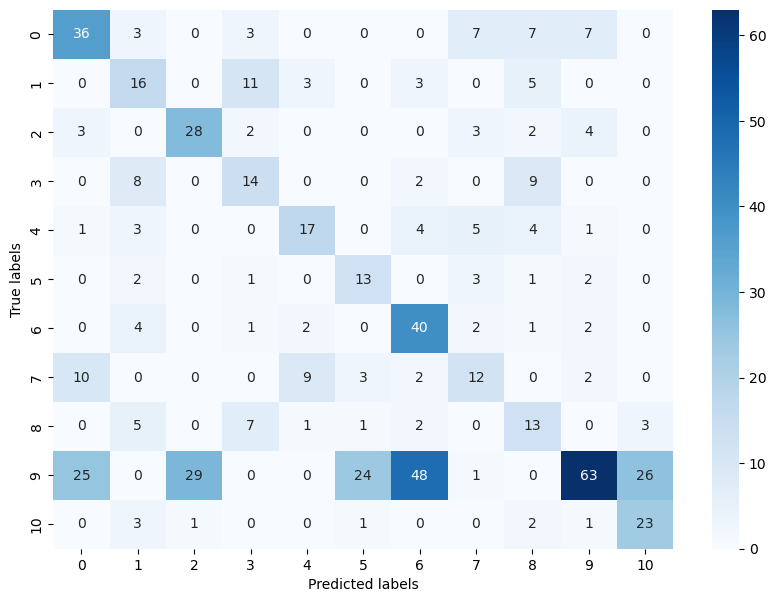

In [38]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

---------------------

In [40]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

In [41]:
# Define the grid search
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)

In [42]:
# Perform the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]})

In [43]:
# Get the best parameters
best_params = grid_search.best_params_

In [44]:
print(f"Best parameters: {best_params}")

Best parameters: {'alpha': 0.1}


In [45]:
# Predict on the test set
y_pred_nb_gs = grid_search.predict(X_test_tfidf)

In [46]:
# Evaluate the classifier
accuracy_nb_gs = accuracy_score(y_test, y_pred_nb_gs)
report_nb_gs = classification_report(y_test, y_pred_nb_gs)

print(f"Naive Bayes with Grid Search Accuracy: {accuracy_nb_gs}")
print(f"Naive Bayes with Grid Search Classification Report:\n{report_nb_gs}")

Naive Bayes with Grid Search Accuracy: 0.44518272425249167
Naive Bayes with Grid Search Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.46      0.52      0.49        63
    Consult - History and Phy.       0.31      0.42      0.36        38
              Gastroenterology       0.48      0.64      0.55        42
              General Medicine       0.31      0.33      0.32        33
                     Neurology       0.50      0.43      0.46        35
       Obstetrics / Gynecology       0.33      0.59      0.42        22
                    Orthopedic       0.39      0.75      0.51        52
                     Radiology       0.36      0.34      0.35        38
 SOAP / Chart / Progress Notes       0.32      0.38      0.35        32
                       Surgery       0.71      0.31      0.43       216
                       Urology       0.45      0.74      0.56        31

                      a

--------------